## Global params

In [1]:
img_directory = '/home/ec2-user/img_align_celeba'
img_save_directory = '/home/ec2-user/autoencoder-vaegan/zach'
model_weights_path = '/home/ec2-user/model-weights.hdf5'
batch_size = 32
training_set_size = 256
img_size = 128

## Imports and helper functions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import load_img, resize_crop
%matplotlib inline

def imshow(imgs):
    fig = plt.figure()
    nimgs = len(imgs)
    for i in range(nimgs):
        a=fig.add_subplot(1,nimgs,i+1)
        plt.imshow(imgs[i])
        plt.axis('off')

## Load training data

In [3]:
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/home/ec2-user/.conda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


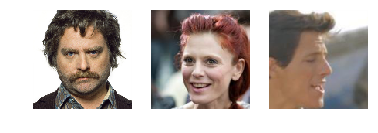

In [4]:
imshow([training[i] for i in range(3)])

## Create model and load weights

In [5]:
from model import Vaegan
model = Vaegan(img_shape=(img_size, img_size, 3), batch_size=batch_size)

Using TensorFlow backend.


In [6]:
y = model.model.predict(training[:batch_size], batch_size=batch_size)
print(y.shape)
y[0]

(32, 128, 128, 3)


array([[[ 0.49996293,  0.49989489,  0.50004292],
        [ 0.5       ,  0.49996901,  0.4999913 ],
        [ 0.50001258,  0.5001123 ,  0.50009751],
        ..., 
        [ 0.49979427,  0.50047672,  0.50010216],
        [ 0.50076973,  0.50024462,  0.49994504],
        [ 0.49998415,  0.5002045 ,  0.49996817]],

       [[ 0.50014436,  0.50004035,  0.49993181],
        [ 0.5000571 ,  0.49996895,  0.50000238],
        [ 0.4999606 ,  0.50011092,  0.50026816],
        ..., 
        [ 0.49947235,  0.50110781,  0.49980518],
        [ 0.50016308,  0.50036234,  0.49877048],
        [ 0.50059986,  0.50039768,  0.49963287]],

       [[ 0.49995238,  0.50017226,  0.49992311],
        [ 0.49985841,  0.50009865,  0.49997985],
        [ 0.5001722 ,  0.49981278,  0.50016516],
        ..., 
        [ 0.49982256,  0.49976456,  0.49962038],
        [ 0.50045443,  0.50096714,  0.50049162],
        [ 0.50029576,  0.50016439,  0.5001049 ]],

       ..., 
       [[ 0.49975407,  0.50018972,  0.50074577],
        

In [7]:
if (False):
    model.model.load_weights(model_weights_path)

## Zach and latest output of Zach

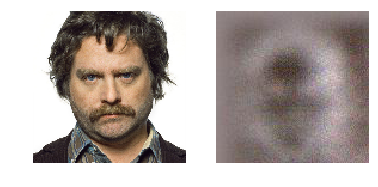

In [16]:
onlyfiles = [f for f in os.listdir(img_save_directory) if os.path.isfile(os.path.join(img_save_directory, f))]
if (len(onlyfiles) > 0):
    latest = max(onlyfiles)
    imshow([training[0], sp.ndimage.imread(os.path.join(img_save_directory, latest))])

## Train

Reset image save filename counter

In [12]:
save_idx = 0

In [15]:
start = save_idx
stop = save_idx + 1

for i in range(start, stop):
    model.model.fit(x=training, y=training, epochs=1, batch_size=batch_size, verbose=True)
    predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
    path = os.path.join(img_save_directory, '%04d.jpg' % i)
    sp.misc.imsave(path, predictions[0])
    save_idx = i
    
# model.model.save_weights(save_model)

Epoch 1/1
256/256 [==============================] - 2s - loss: 1879.8111     


In [10]:
predictions = model.model.predict(training[:batch_size], batch_size=batch_size)
predictions.shape
predictions[0]
# np.argwhere(np.isnan(predictions))

array([[[ 0.49996293,  0.49989489,  0.50004292],
        [ 0.5       ,  0.49996901,  0.4999913 ],
        [ 0.50001258,  0.5001123 ,  0.50009751],
        ..., 
        [ 0.49979427,  0.50047672,  0.50010216],
        [ 0.50076973,  0.50024462,  0.49994504],
        [ 0.49998415,  0.5002045 ,  0.49996817]],

       [[ 0.50014436,  0.50004035,  0.49993181],
        [ 0.5000571 ,  0.49996895,  0.50000238],
        [ 0.4999606 ,  0.50011092,  0.50026816],
        ..., 
        [ 0.49947235,  0.50110781,  0.49980518],
        [ 0.50016308,  0.50036234,  0.49877048],
        [ 0.50059986,  0.50039768,  0.49963287]],

       [[ 0.49995238,  0.50017226,  0.49992311],
        [ 0.49985841,  0.50009865,  0.49997985],
        [ 0.5001722 ,  0.49981278,  0.50016516],
        ..., 
        [ 0.49982256,  0.49976456,  0.49962038],
        [ 0.50045443,  0.50096714,  0.50049162],
        [ 0.50029576,  0.50016439,  0.5001049 ]],

       ..., 
       [[ 0.49975407,  0.50018972,  0.50074577],
        